# チャネル導波路と準位相整合（QPM）について

## 概要
均一な断面を持つチャネル導波路を考える。導波路は、導波路材料の光学的主軸の1つに平行であり、この軸を座標系の $z$ 軸とする。導波路は、相対誘電率プロファイル $\boldsymbol{\epsilon}(x, y)$ によって記述される。この導波路は、基本波（ポンプ波）と第二高調波（SH波）の両方に対して少なくとも1つの導波モードをサポートすると仮定する。

## 準位相整合（QPM）のためのグレーティング
図3.1は、準位相整合（QPM）のための周期 $A$ のグレーティングを持つチャネル導波路を示している。このデバイスは、導波路の光学定数（誘電率および/またはSHG係数）に周期的な変調を与えることで作製できる。構造は、誘電率とSHG係数の分布によって記述される。相対誘電率の周期的な変調を $\Delta\boldsymbol{\epsilon}(x,y,z)$ とすると、$\Delta\boldsymbol{\epsilon}$ はフーリエ級数の形で表すことができる：

$$
\Delta\boldsymbol{\epsilon}(x,y,z)=\sum_{q}\Delta{\boldsymbol{\epsilon}_{q}}(x,y)\exp(-jqKz), \quad K=2\pi/\Lambda, \tag{3.1}
$$

ここで、$\Delta\boldsymbol{\epsilon}_{q}$ は $q$ 次のフーリエ成分の振幅であり、$K$ はグレーティングの空間周波数、すなわちグレーティングベクトルの大きさである。周期的な変調を持つSHG係数の分布は次のように書ける：

$$
d(x,y,z)=\sum_{q}d_{q}(x,y)\exp(-jqKz), \quad K=2\pi/\Lambda. \tag{3.2}
$$

Figure 3.8 illustrates the modulation of optical constants in a chirped grating. We consider a linearly-frequency chirped grating. The chirped grating structure results when a coordinate conversion

$$
x = x', \quad y = y', \quad z = z' + (r/2)z'^2 \quad (r \neq 0) \tag{3.75}
$$

is made for $(x, y, z)$ used to describe the uniform grating, and then $(x', y', z')$ is identified as a new $(x, y, z)$ system. From (3.1), (3.2), (3.75) we have

$$
\Delta \epsilon(x, y, z) = \sum_q \Delta \epsilon_q(x, y) \exp[-jq \Phi(z)], \tag{3.76a}
$$

$$
d(x, y, z) = \sum_q d_q(x, y) \exp[-jq \Phi(z)], \tag{3.76b}
$$

$$
\Phi(z) = K_0 [z + (r/2)z^2]. \tag{3.76c}
$$

For a binary modulation, the Fourier amplitudes are given by (3.3) and (3.4). From (3.76), we obtain expressions for the local spatial frequency and the grating period:

$$
K(z) = d[\Phi(z)] / dz = K_0 (1 + rz), \tag{3.77a}
$$

$$
A(z) = 2\pi / K(z) = A_0 / (1 + rz), \quad A_0 = 2\pi / K_0, \tag{3.77b}
$$

where $A_0$ is the period at $z = 0$, and $r$ is a chirp rate.

In [2]:
import matplotlib as mpl

# 現在のフォントサイズを取得
current_font_size = mpl.rcParams['font.size']

# フォントサイズを1.5倍に設定
mpl.rcParams['font.size'] = current_font_size * 1.5

# フォントファミリーを設定
mpl.rcParams['font.family'] = 'Noto Sans CJK JP'

Calculating SHG Efficiency: 100%|██████████| 1000/1000 [00:09<00:00, 100.45it/s]
/workspaces/mictlan/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspaces/mictlan/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25563 (\N{CJK UNIFIED IDEOGRAPH-63DB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspaces/mictlan/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21177 (\N{CJK UNIFIED IDEOGRAPH-52B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspaces/mictlan/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/workspaces/mictlan/.venv/lib/pytho


最大効率: 0.0024123629549734267
最大効率に対応する波長: 1.0297837837837835 µm


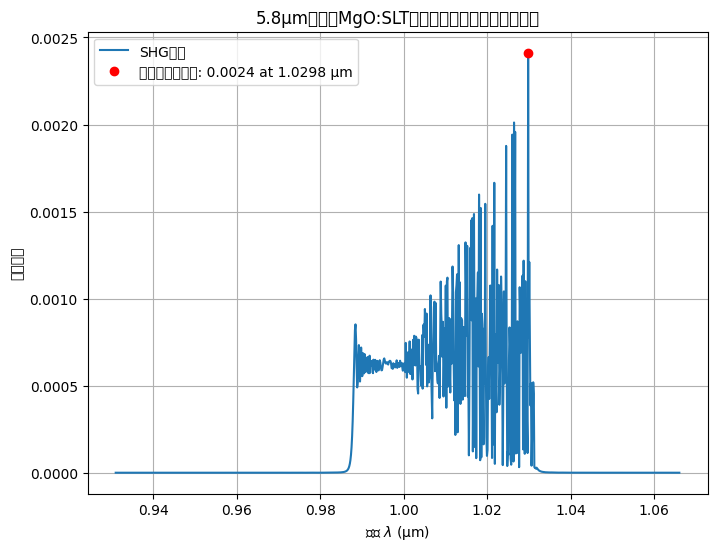

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from syuron import shg
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor  # マルチプロセス用

# 定数
P0 = 1.0  # P0 = |A0|^2
kappa = 1.31E-05  # 野呂さんの値
r = 0.000002  # チャープパラメータ（周期分極反転構造の場合は0）
T = 70  # 温度 (°C)
n_layers = 9999
L = 7.2 * 9999

# 位相整合条件
pm_lambda = 1.031

# 波長範囲
lambda_min = pm_lambda - 0.1
lambda_max = pm_lambda + 0.035
lambda_values = np.linspace(lambda_min, lambda_max, 1000)  # 横軸: 波長 λ

# ChirpedGrating クラスのインスタンスを作成
grating = shg.Grating(P0, kappa, T)
grating = shg.Grating(P0, kappa, T)
grating.setup_chirped_grating(r, L, pm_lambda=pm_lambda)

# 初期値と終端値のΛを表示
# Lambda_i = grating.Lambda_z(0)
# print(f"Initial Lambda: {Lambda_i}")
# Lambda_e = grating.Lambda_z(2000)
# print(f"Exit Lambda: {Lambda_e}")


# 変換効率を計算する関数
def calculate_efficiency(lambda_val):
    return grating.calculate_efficiency(lambda_val)


# マルチプロセスで並列化（順序を保持）
with ProcessPoolExecutor() as executor:  # 20プロセスで並列化
    efficiencies = list(tqdm(executor.map(calculate_efficiency, lambda_values), total=len(
        lambda_values), desc="Calculating SHG Efficiency"))

# グラフの描画
plt.figure(figsize=(8, 6))
plt.plot(lambda_values, efficiencies, label="SHG効率")

# グラフの装飾
plt.xlabel(r"波長 $\lambda$ (µm)")
plt.ylabel("変換効率")
plt.title("5.8µm周期のMgO:SLTの変換効率のスペクトル分布")
plt.grid(True)
plt.legend()

# 最大効率とそのインデックスを取得
max_efficiency = max(efficiencies)
max_index = efficiencies.index(max_efficiency)
max_lambda = lambda_values[max_index]

# 最大値とその波長を表示
print(f"\n最大効率: {max_efficiency}")
print(f"最大効率に対応する波長: {max_lambda} µm")

# グラフに最大値をプロット
plt.plot(max_lambda, max_efficiency, 'ro',
         label=f"最大となる位置: {max_efficiency:.4f} at {max_lambda:.4f} µm")
plt.legend()
plt.show()

start_width: 7.2, end_width: 6.293785516181323, length: 9999


Calculating SHG Efficiency: 100%|██████████| 1000/1000 [00:31<00:00, 31.34it/s]



最大効率: 0.0023319144916974064
最大効率に対応する波長: 1.0297837837837835 µm


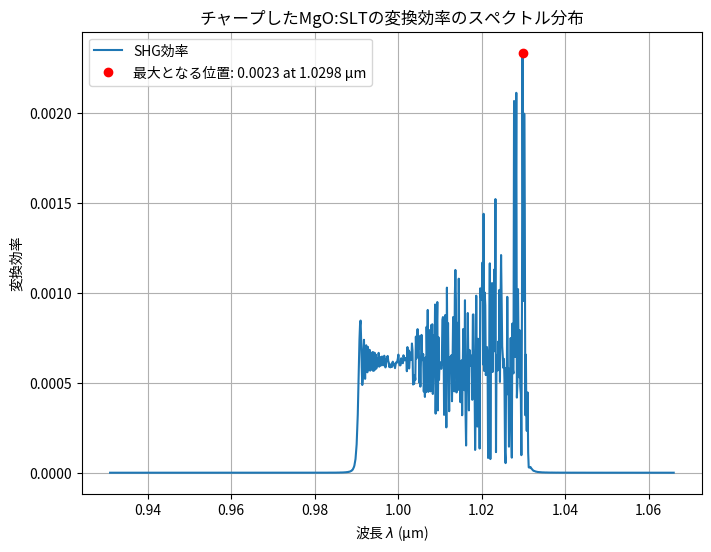

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from syuron import shg
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor

# 定数
P0 = 1.0  # P0 = |A0|^2
kappa = 1.31E-05  # 野呂さんの値
r = 0.000002  # チャープパラメータ（周期分極反転構造の場合は0）
T = 70  # 温度 (°C)

# 位相整合条件
pm_lambda = 1.031

# Λ(z) = Λ_0 / (1 + 0.0001z) を離散化して widths を作成
Lambda_0 = 7.2  # 基準幅
n_layers = 9999  # 層の数
L = Lambda_0 * n_layers
z_values = np.linspace(0, L, n_layers)  # 解像度が1000の場合、幅の数は999個
widths = Lambda_0 / (1 + r * z_values)
print(
    f"start_width: {widths[0]}, end_width: {widths[-1]}, length: {len(widths)}")

# 波長範囲
lambda_min = pm_lambda - 0.1
lambda_max = pm_lambda + 0.035
lambda_values = np.linspace(lambda_min, lambda_max, 1000)  # 横軸: 波長 λ

# Grating クラスのインスタンスを作成
grating = shg.Grating(P0, kappa, T)
grating.setup_general_grating(widths)


# 変換効率を計算する関数
def calculate_efficiency(lambda_val):
    return grating.calculate_efficiency(lambda_val)


# マルチプロセスで並列化（順序を保持）
with ProcessPoolExecutor() as executor:  # デフォルトのワーカー数で並列化
    # executor.map を使って順序を保持しながら計算
    efficiencies = list(tqdm(executor.map(calculate_efficiency, lambda_values), total=len(
        lambda_values), desc="Calculating SHG Efficiency"))

# グラフの描画
plt.figure(figsize=(8, 6))
plt.plot(lambda_values, efficiencies, label="SHG効率")

# グラフの装飾
plt.xlabel(r"波長 $\lambda$ (µm)")
plt.ylabel("変換効率")
plt.title("チャープしたMgO:SLTの変換効率のスペクトル分布")
plt.grid(True)
plt.legend()

# 最大効率とそのインデックスを取得
max_efficiency = max(efficiencies)
max_index = efficiencies.index(max_efficiency)
max_lambda = lambda_values[max_index]

# 最大値とその波長を表示
print(f"\n最大効率: {max_efficiency}")
print(f"最大効率に対応する波長: {max_lambda} µm")

# グラフに最大値をプロット
plt.plot(max_lambda, max_efficiency, 'ro',
         label=f"最大となる位置: {max_efficiency:.4f} at {max_lambda:.4f} µm")
plt.legend()
plt.show()

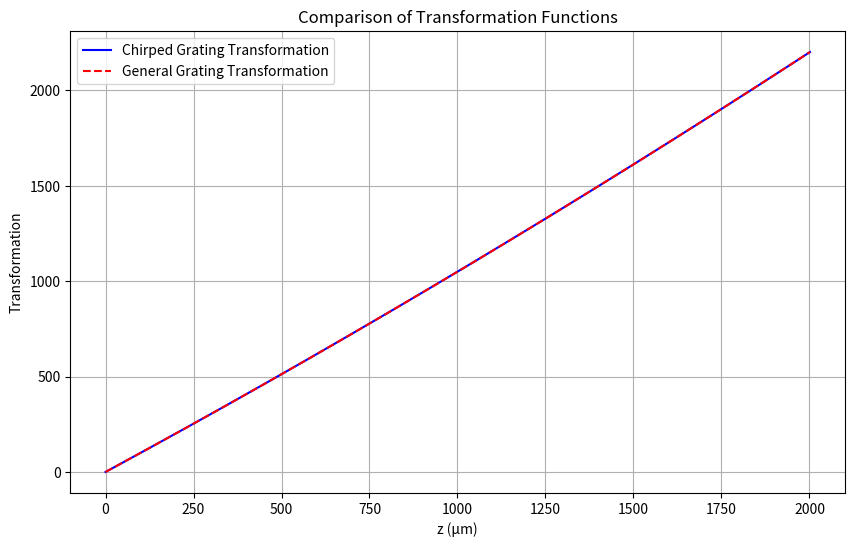

In [14]:
from syuron import shg
import numpy as np
import matplotlib.pyplot as plt

# 定数
P0 = 1.0  # P0 = |A0|^2
kappa = 1.31E-05  # 野呂さんの値
r = 0.0001  # チャープパラメータ（周期分極反転構造の場合は0）
T = 70  # 温度 (°C)
pm_lambda = 1.031  # 位相整合条件
Lambda_0 = 7.2  # 基準波長
n_layers = 278
L = Lambda_0 * n_layers  # 長さ

# 1つ目のGratingインスタンスを作成 (setup_chirped_grating)
grating_chirped = shg.Grating(P0, kappa, T)
grating_chirped.setup_chirped_grating(r, L, pm_lambda=pm_lambda)

# 2つ目のGratingインスタンスを作成 (setup_general_grating)
z_values = np.linspace(0, L, n_layers)
widths = Lambda_0 / (1 + r * z_values)
grating_general = shg.Grating(P0, kappa, T)
grating_general.setup_general_grating(widths)

# z軸の値を生成
z_values_plot = np.linspace(0, L, n_layers+1)

# transformation関数を評価
transformation_chirped = grating_chirped.transformation(z_values_plot)
transformation_general = grating_general.transformation(z_values_plot)


# プロット
plt.figure(figsize=(10, 6))
plt.plot(z_values_plot, transformation_chirped,
         label="Chirped Grating Transformation", linestyle='-', color='blue')
plt.plot(z_values_plot, transformation_general,
         label="General Grating Transformation", linestyle='--', color='red')

# グラフの装飾
plt.xlabel("z (µm)")
plt.ylabel("Transformation")
plt.title("Comparison of Transformation Functions")
plt.grid(True)
plt.legend()
plt.show()

Calculating General Grating Efficiency: 100%|██████████| 1000/1000 [00:00<00:00, 1041.39it/s]
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u9577' [U+9577], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6ce2' [U+6ce2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u9577' [U+9577], substituting with a dummy symbol.



Chirped Grating 最大効率: 1.766785118541197e-05
Chirped Grating 最大効率に対応する波長: 1.0228918918918917 µm
General Grating 最大効率: 1.7676778830212177e-05
General Grating 最大効率に対応する波長: 1.0228918918918917 µm


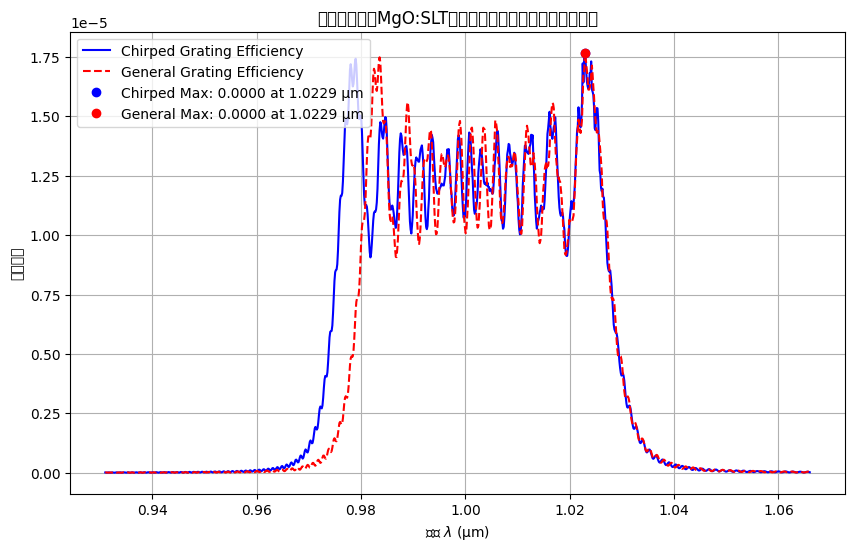

In [4]:
from syuron import shg
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor

# 定数
P0 = 1.0  # P0 = |A0|^2
kappa = 1.31E-05  # 野呂さんの値
r = 0.0001  # チャープパラメータ（周期分極反転構造の場合は0）
T = 70  # 温度 (°C)
pm_lambda = 1.031  # 位相整合条件
Lambda_0 = 7.2  # 最初の幅
n_layers = 278
L = Lambda_0 * n_layers  # 長さ

# 1つ目のGratingインスタンスを作成 (setup_chirped_grating)
grating_chirped = shg.Grating(P0, kappa, T)
# grating_chirped.setup_chirped_grating(r, L, pm_lambda=pm_lambda)
grating_chirped.setup_chirped_grating(r, L, Lambda_0=Lambda_0)

# 2つ目のGratingインスタンスを作成 (setup_general_grating)
z_values = np.linspace(0, L, n_layers)
widths = Lambda_0 / (1 + r * z_values)
grating_general = shg.Grating(P0, kappa, T)
grating_general.setup_general_grating(widths)

# 波長範囲
# lambda_min = pm_lambda - 0.006
# lambda_max = pm_lambda + 0.004
lambda_min = pm_lambda - 0.1
lambda_max = pm_lambda + 0.035
lambda_values = np.linspace(lambda_min, lambda_max, 1000)  # 横軸: 波長 λ


def calculate_chirped_efficiency(lambda_val):
    return grating_chirped.calculate_efficiency(lambda_val)


def calculate_general_efficiency(lambda_val):
    return grating_general.calculate_efficiency(lambda_val)


# マルチプロセスで並列化（順序を保持）
with ProcessPoolExecutor() as executor:
    # Chirped Grating の変換効率を計算
    efficiencies_chirped = list(tqdm(executor.map(calculate_chirped_efficiency, lambda_values),
                                     total=len(lambda_values), desc="Calculating Chirped Grating Efficiency"))

    # General Grating の変換効率を計算
    efficiencies_general = list(tqdm(executor.map(calculate_general_efficiency, lambda_values),
                                     total=len(lambda_values), desc="Calculating General Grating Efficiency"))

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, efficiencies_chirped,
         label="Chirped Grating Efficiency", linestyle='-', color='blue')
plt.plot(lambda_values, efficiencies_general,
         label="General Grating Efficiency", linestyle='--', color='red')

# グラフの装飾
plt.xlabel(r"波長 $\lambda$ (µm)")
plt.ylabel("変換効率")
plt.title("チャープしたMgO:SLTの変換効率のスペクトル分布比較")
plt.grid(True)
plt.legend()

# 最大効率とそのインデックスを取得
max_efficiency_chirped = max(efficiencies_chirped)
max_index_chirped = efficiencies_chirped.index(max_efficiency_chirped)
max_lambda_chirped = lambda_values[max_index_chirped]

max_efficiency_general = max(efficiencies_general)
max_index_general = efficiencies_general.index(max_efficiency_general)
max_lambda_general = lambda_values[max_index_general]

# 最大値とその波長を表示
print(f"\nChirped Grating 最大効率: {max_efficiency_chirped}")
print(f"Chirped Grating 最大効率に対応する波長: {max_lambda_chirped} µm")
print(f"General Grating 最大効率: {max_efficiency_general}")
print(f"General Grating 最大効率に対応する波長: {max_lambda_general} µm")

# グラフに最大値をプロット
plt.plot(max_lambda_chirped, max_efficiency_chirped, 'bo',
         label=f"Chirped Max: {max_efficiency_chirped:.4f} at {max_lambda_chirped:.4f} µm")
plt.plot(max_lambda_general, max_efficiency_general, 'ro',
         label=f"General Max: {max_efficiency_general:.4f} at {max_lambda_general:.4f} µm")
plt.legend()
plt.show()

Calculating Random Grating Efficiency: 100%|██████████| 1000/1000 [00:11<00:00, 87.29it/s]



Random Grating 最大効率: 0.0012161135174383957
Random Grating 最大効率に対応する波長: 0.961125125125125 µm


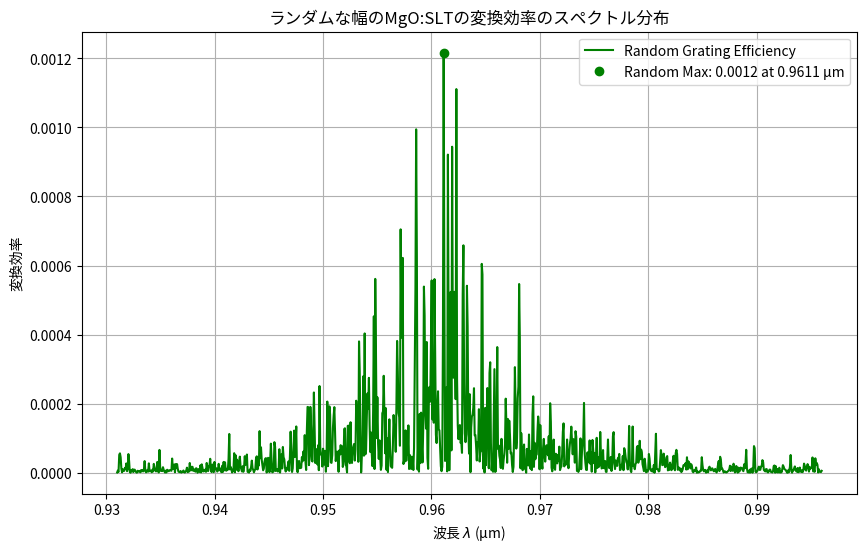

In [ ]:
import numpy as np

# ランダムな幅を6.0～7.2の範囲で生成
widths_random = np.random.uniform(5.0, 6.6, n_layers)

# Gratingインスタンスを作成
grating_random = shg.Grating(P0, kappa, T)
grating_random.setup_general_grating(widths_random)

# 波長範囲
lambda_min = pm_lambda - 0.1
lambda_max = pm_lambda + 0.035
lambda_values = np.linspace(lambda_min, lambda_max, 1000)  # 横軸: 波長 λ

# ランダムな幅の変換効率を計算


def calculate_random_efficiency(lambda_val):
    return grating_random.calculate_efficiency(lambda_val)


# マルチプロセスで並列化（順序を保持）
with ProcessPoolExecutor() as executor:
    efficiencies_random = list(tqdm(executor.map(calculate_random_efficiency, lambda_values),
                                    total=len(lambda_values), desc="Calculating Random Grating Efficiency"))

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, efficiencies_random,
         label="Random Grating Efficiency", linestyle='-', color='green')

# グラフの装飾
plt.xlabel(r"波長 $\lambda$ (µm)")
plt.ylabel("変換効率")
plt.title("ランダムな幅のMgO:SLTの変換効率のスペクトル分布")
plt.grid(True)
plt.legend()

# 最大効率とそのインデックスを取得
max_efficiency_random = max(efficiencies_random)
max_index_random = efficiencies_random.index(max_efficiency_random)
max_lambda_random = lambda_values[max_index_random]

# 最大値とその波長を表示
print(f"\nRandom Grating 最大効率: {max_efficiency_random}")
print(f"Random Grating 最大効率に対応する波長: {max_lambda_random} µm")

# グラフに最大値をプロット
plt.plot(max_lambda_random, max_efficiency_random, 'go',
         label=f"Random Max: {max_efficiency_random:.4f} at {max_lambda_random:.4f} µm")
plt.legend()
plt.show()

Calculating Sin Grating Efficiency: 100%|██████████| 1000/1000 [00:06<00:00, 159.59it/s]



Sin Grating 最大効率: 0.0001913257186371315
Sin Grating 最大効率に対応する波長: 0.9773513513513512 µm


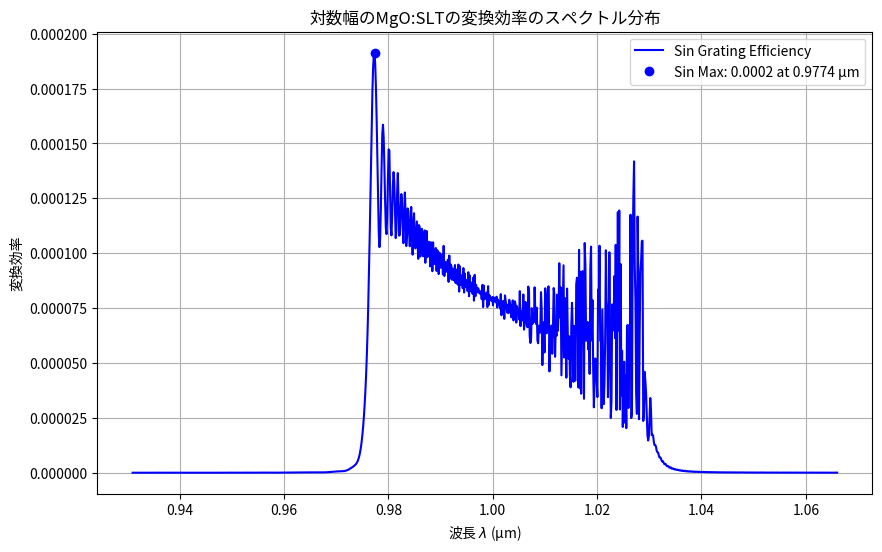

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm
from syuron import shg  # 仮定したSHGモジュール

# 定数
P0 = 1.0  # P0 = |A0|^2
kappa = 1.31E-05  # 野呂さんの値
T = 70  # 温度 (°C)
pm_lambda = 1.031  # 位相整合条件
n_layers = 1999

# sin波のような変化をする幅を6.0～7.2の範囲で生成
x = np.linspace(0, 2 * np.pi * 100, n_layers)  # 0から2πまでの範囲でn_layers点を生成
widths_sin = 6.0 + 0.6 * (1 + np.sin(x))  # 6.0～7.2の範囲でsin波のような変化

# A/(1 + B*x)のような形で、値の範囲が7.2～6.0となる配列を生成
x = np.linspace(0, 1, n_layers)  # 0から1までの範囲でn_layers点を生成
A = 7.2
B = (A / 6.0) - 1  # 7.2 / (1 + B * 1) = 6.0 となるようにBを計算
widths_ab = A / (1 + B * x)  # 7.2～6.0の範囲でA/(1 + B*x)のような変化

# 指数関数を使って幅を生成
x = np.linspace(0, 1, n_layers)  # 0から1までの範囲でn_layers点を生成
A = 7.2
C = 1.5  # 指数関数の係数（調整可能）
widths_exp = A * np.exp(-C * x)  # 7.2から減少する指数関数

# 値を6.0～7.2の範囲にスケーリング
widths_exp = 6.0 + (widths_exp - np.min(widths_exp)) * \
    (7.2 - 6.0) / (np.max(widths_exp) - np.min(widths_exp))

# 線形変化を2つの区間に分けて適用
x = np.linspace(0, 1.2, n_layers)  # 0から1までの範囲でn_layers点を生成
A = 7.2  # 初期値
B1 = -1.2  # 前半の傾き（緩やか）
B2 = -2.4  # 後半の傾き（急）

# 前半（0～0.5）と後半（0.5～1）で異なる傾きを適用
widths_linear = np.where(
    x <= 0.5,
    A + B1 * x,  # 前半: 緩やかな傾き
    A + B1 * 0.5 + B2 * (x - 0.5)  # 後半: 急な傾き
)

# Gratingインスタンスを作成
grating_sin = shg.Grating(P0, kappa, T)
grating_sin.setup_general_grating(widths_exp)

# 波長範囲
lambda_min = pm_lambda - 0.1
lambda_max = pm_lambda + 0.035
lambda_values = np.linspace(lambda_min, lambda_max, 1000)  # 横軸: 波長 λ


# sin波のような幅構造の変換効率を計算
def calculate_sin_efficiency(lambda_val):
    return grating_sin.calculate_efficiency(lambda_val)


# マルチプロセスで並列化（順序を保持）
with ProcessPoolExecutor() as executor:
    efficiencies_sin = list(tqdm(executor.map(calculate_sin_efficiency, lambda_values),
                                 total=len(lambda_values), desc="Calculating Sin Grating Efficiency"))

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, efficiencies_sin,
         label="Sin Grating Efficiency", linestyle='-', color='blue')

# グラフの装飾
plt.xlabel(r"波長 $\lambda$ (µm)")
plt.ylabel("変換効率")
plt.title("対数幅のMgO:SLTの変換効率のスペクトル分布")
plt.grid(True)
plt.legend()

# 最大効率とそのインデックスを取得
max_efficiency_sin = max(efficiencies_sin)
max_index_sin = efficiencies_sin.index(max_efficiency_sin)
max_lambda_sin = lambda_values[max_index_sin]

# 最大値とその波長を表示
print(f"\nSin Grating 最大効率: {max_efficiency_sin}")
print(f"Sin Grating 最大効率に対応する波長: {max_lambda_sin} µm")

# グラフに最大値をプロット
plt.plot(max_lambda_sin, max_efficiency_sin, 'bo',
         label=f"Sin Max: {max_efficiency_sin:.4f} at {max_lambda_sin:.4f} µm")
plt.legend()
plt.show()

$x^\mu$ から $x^\nu$への座標変換を考える
$$
\int \Lambda(z)dz
$$